# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob 
from textblob import Word
from nltk.stem import PorterStemmer

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras

In [4]:
from tensorflow.keras import Sequential,Model
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense,MaxPool1D,Dropout,Embedding,Activation,Convolution1D,add,BatchNormalization,Flatten,Reshape,Concatenate,LSTM,GRU
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,Callback
from tensorflow.keras.optimizers import Adam,SGD,Adamax,RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Reading Datasets

You can find the dataset by the following link https://www.kaggle.com/datasets/aaron7sun/stocknews

News data: historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date.
(Range: 2008-06-08 to 2016-07-01)

Stock data: Dow Jones Industrial Average (DJIA) is used to "prove the concept"

In [6]:
dj = pd.read_csv('upload_DJIA_table.csv')
news= pd.read_csv('RedditNews1.csv')
Top_news = pd.read_csv('Combined_News_DJIA1.csv')

In [7]:
dj

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [8]:
dj.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
news

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...
73603,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
73604,2008-06-08,b'Threat of world AIDS pandemic among heterose...
73605,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
73606,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."


In [10]:
news['News'][1]

'IMF chief backs Athens as permanent Olympic host'

In [11]:
Top_news

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [12]:
Top_news.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

# Dropping columns

In [13]:
dj = dj.drop(['High','Low','Close','Volume','Adj Close'],axis=1)
dj.head()

,Date,Open
0,2016-07-01,17924.240234
1,2016-06-30,17712.759766
2,2016-06-29,17456.019531
3,2016-06-28,17190.509766
4,2016-06-27,17355.210938


In [14]:
dj= dj.set_index('Date')
dj.head()

,Open
Date,
2016-07-01,17924.240234
2016-06-30,17712.759766
2016-06-29,17456.019531
2016-06-28,17190.509766
2016-06-27,17355.210938


# Calculating the difference of price

In [15]:
dj =-1 * dj.diff(periods=1)
dj.head()

,Open
Date,
2016-07-01,NaN
2016-06-30,211.480468
2016-06-29,256.740235
2016-06-28,265.509765
2016-06-27,-164.701172


In [16]:
dj['Date']=dj.index
dj= dj.reset_index(drop=True)

# Merging the datasets

In [17]:
Final_df = Top_news.merge(dj,how="inner",on="Date")
Final_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",297.580078
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",52.030273
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",-148.890625
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,-100.739258
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b""Georgia confict could set back Russia's US r..."

# Combining the column of news

In [18]:
# Combing Headlines
headline=[]
for row in range(0,len(Final_df.index)):
    headline.append(" ".join(str(x) for x in Final_df.iloc[row,2:27]))

In [19]:
Final_df['Combined News'] = headline

In [20]:
Final_df = Final_df[Final_df.Open.notnull()]
Final_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,Combined News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",297.580078,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",52.030273,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",-148.890625,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,-100.739258,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'War in the Caucasus is 

In [21]:
print(Final_df['Open'][0])
print(Final_df['Combined News'][0])

297.58007799999905
b"Georgia 'downs two Russian warplanes' as countries move to brink of war" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side" b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' 

In [22]:
Final_df = Final_df.drop(['Top1','Top2','Top3','Top4','Top5','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)


In [23]:
Final_df

,Date,Label,Open,Combined News
0,2008-08-08,0,297.580078,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,52.030273,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,-148.890625,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,-100.739258,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,79.139649,b'All the experts admit that we should legalis...
...,...,...,...,...
1983,2016-06-24,0,-591.419921,David Cameron to Resign as PM After EU Referen...
1984,2016-06-27,0,-164.701172,Barclays and RBS shares suspended from trading...
1985,2016-06-28,1,265.509765,"2,500 Scientists To Australia: If You Want To ..."
1986,2016-06-29,1,256.740235,Explosion At Airport In Istanbul Yemeni former...


In [24]:
Final_df['Combined News'][1987]

"Jamaica proposes marijuana dispensers for tourists at airports following legalisation: The kiosks and desks would give people a license to purchase up to 2 ounces of the drug to use during their stay Stephen Hawking says pollution and 'stupidity' still biggest threats to mankind: we have certainly not become less greedy or less stupid in our treatment of the environment over the past decade Boris Johnson says he will not run for Tory party leadership Six gay men in Ivory Coast were abused and forced to flee their homes after they were pictured signing a condolence book for victims of the recent attack on a gay nightclub in Florida Switzerland denies citizenship to Muslim immigrant girls who refused to swim with boys: report Palestinian terrorist stabs israeli teen girl to death in her bedroom Puerto Rico will default on $1 billion of debt on Friday Republic of Ireland fans to be awarded medal for sportsmanship by Paris mayor. Afghan suicide bomber 'kills up to 40' - BBC News US airstr

# Normalizing the difference of prcie

In [25]:
max_price= max(Final_df['Open'])
min_price= min(Final_df['Open'])
mean_price= np.mean(Final_df['Open'])
def normalise(price):
    return ((price - min_price)/(max_price-min_price))
print(max_price)
print(min_price)
print(mean_price)

926.5498050000006
-768.0400389999995
3.26566921026157


In [26]:
norm_price=[]
for p in Final_df['Open']:
    norm_price.append(normalise(p))

In [27]:
print(max(norm_price))
print(min(norm_price))
print(np.mean(norm_price))

1.0
0.0
0.45515775450986423


In [28]:
Final_df['Norm_Price'] = norm_price
Final_df

,Date,Label,Open,Combined News,Norm_Price
0,2008-08-08,0,297.580078,"b""Georgia 'downs two Russian warplanes' as cou...",0.628837
1,2008-08-11,1,52.030273,b'Why wont America and Nato help us? If they w...,0.483934
2,2008-08-12,0,-148.890625,b'Remember that adorable 9-year-old who sang a...,0.365368
3,2008-08-13,0,-100.739258,b' U.S. refuses Israel weapons to attack Iran:...,0.393783
4,2008-08-14,1,79.139649,b'All the experts admit that we should legalis...,0.499932
...,...,...,...,...,...
1983,2016-06-24,0,-591.419921,David Cameron to Resign as PM After EU Referen...,0.104226
1984,2016-06-27,0,-164.701172,Barclays and RBS shares suspended from trading...,0.356038
1985,2016-06-28,1,265.509765,"2,500 Scientists To Australia: If You Want To ...",0.609911
1986,2016-06-29,1,256.740235,Explosion At Airport In Istanbul Yemeni former...,0.604736


# Data preprocessing

In [29]:
stop_words = stopwords.words('english') #English language's stop words
lemmetizer = WordNetLemmatizer()

def textpreprocess(s):
    """This function cleans the text
    Input: string to be cleaned
    Return: string after cleaning
    """
    words = [] # empty list
    
    s = s.strip().lower() # lower the string
    s = re.sub("b'","",s)
    s = re.sub("b","",s)
    s = re.sub(r"won't", "will not", s)
    s = re.sub(r"can\'t", "can not", s)    
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'d", " would", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub('\[.*?\]', '', s) # removes symbols (.*?\)
    s = re.sub('https?://\S+|www\.\S+', '', s) # remove URLS
    s = re.sub('<.*?>+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s) # remove punctuations
    s = re.sub('\n', '', s) # remove next line character
    s = re.sub('\w*\d\w*', '', s)
   
    words = s.split() # split the string into list of words
    words = [word for word in words if word not in stop_words] # removing stop words
    s = ' '.join(words) # converting list to string
    return s
    #return words

In [30]:
Cleaned_Combined_News = []
sentences = list(Final_df['Combined News'])
for sen in sentences:
    Cleaned_Combined_News.append(textpreprocess(sen))

In [31]:
print(Final_df['Combined News'][0])

b"Georgia 'downs two Russian warplanes' as countries move to brink of war" b'BREAKING: Musharraf to be impeached.' b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)' b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire' b"Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing" b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side" b"The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]' b'Did the U.S. Prep Georgia for War with Russia?' b'Rice Gives Green 

In [32]:
Final_df['Cleaned_Combined_News'] = Cleaned_Combined_News
Final_df

,Date,Label,Open,Combined News,Norm_Price,Cleaned_Combined_News
0,2008-08-08,0,297.580078,"b""Georgia 'downs two Russian warplanes' as cou...",0.628837,georgia wouldowns two russian warplanes countr...
1,2008-08-11,1,52.030273,b'Why wont America and Nato help us? If they w...,0.483934,wont america nato help us wont help us help ir...
2,2008-08-12,0,-148.890625,b'Remember that adorable 9-year-old who sang a...,0.365368,rememer adorale sang opening ceremonies fake r...
3,2008-08-13,0,-100.739258,b' U.S. refuses Israel weapons to attack Iran:...,0.393783,us refuses israel weapons attack iran report p...
4,2008-08-14,1,79.139649,b'All the experts admit that we should legalis...,0.499932,experts admit legalise drugs war south osetia ...
...,...,...,...,...,...,...
1983,2016-06-24,0,-591.419921,David Cameron to Resign as PM After EU Referen...,0.104226,david cameron resign pm eu referendum c foreca...
1984,2016-06-27,0,-164.701172,Barclays and RBS shares suspended from trading...,0.356038,arclays rs shares suspended trading tanking po...
1985,2016-06-28,1,265.509765,"2,500 Scientists To Australia: If You Want To ...",0.609911,scientists australia want save great arrier re...
1986,2016-06-29,1,256.740235,Explosion At Airport In Istanbul Yemeni former...,0.604736,explosion airport istanul yemeni former presid...


# Dividing the dataset to features and target

In [33]:
X = []
sentences = list(Final_df['Combined News'])
for sen in sentences:
    X.append(textpreprocess(sen))

In [34]:
Final_df['Length'] = Final_df.Cleaned_Combined_News.apply(lambda x:len(x))
Final_df

,Date,Label,Open,Combined News,Norm_Price,Cleaned_Combined_News,Length
0,2008-08-08,0,297.580078,"b""Georgia 'downs two Russian warplanes' as cou...",0.628837,georgia wouldowns two russian warplanes countr...,1721
1,2008-08-11,1,52.030273,b'Why wont America and Nato help us? If they w...,0.483934,wont america nato help us wont help us help ir...,1182
2,2008-08-12,0,-148.890625,b'Remember that adorable 9-year-old who sang a...,0.365368,rememer adorale sang opening ceremonies fake r...,1469
3,2008-08-13,0,-100.739258,b' U.S. refuses Israel weapons to attack Iran:...,0.393783,us refuses israel weapons attack iran report p...,1521
4,2008-08-14,1,79.139649,b'All the experts admit that we should legalis...,0.499932,experts admit legalise drugs war south osetia ...,1405
...,...,...,...,...,...,...,...
1983,2016-06-24,0,-591.419921,David Cameron to Resign as PM After EU Referen...,0.104226,david cameron resign pm eu referendum c foreca...,1797
1984,2016-06-27,0,-164.701172,Barclays and RBS shares suspended from trading...,0.356038,arclays rs shares suspended trading tanking po...,1888
1985,2016-06-28,1,265.509765,"2,500 Scientists To Australia: If You Want To ...",0.609911,scientists australia want save great arrier re...,2112
1986,2016-06-29,1,256.740235,Explosion At Airport In Istanbul Yemeni former...,0.604736,explosion airport istanul yemeni former presid...,1973


In [35]:
Final_df.Length.max()

3313

In [36]:
Final_df.Length.min()

1103

In [37]:
Final_df.loc[Final_df['Open'].idxmax()]


Date                                                            2008-10-13
Label                                                                    1
Open                                                            926.549805
Combined News            b'EU Bans the Incandescent Light Bulb' b'AFP: ...
Norm_Price                                                             1.0
Cleaned_Combined_News    eu ans incandescent light ul afp paul krugman ...
Length                                                                1322
Name: 45, dtype: object

In [38]:
Final_df.loc[Final_df['Open'].idxmin()]


Date                                                            2008-09-29
Label                                                                    0
Open                                                           -768.040039
Combined News            b'The Power Of Nightmares - BBC (Part 1)' b"Ja...
Norm_Price                                                             0.0
Cleaned_Combined_News    power nightmares c part japan makes cars saudi...
Length                                                                1430
Name: 35, dtype: object

In [39]:
Final_df['Combined News'][45]

'b\'EU Bans the Incandescent Light Bulb\' b\'AFP: Paul Krugman wins Nobel Economics Prize\' b\'Europe to U.S.: You messed up the rescue, too\' b\'Hindu Threat to Christians: Convert or Flee\' b\'Europe puts $2.3 trillion on line for banks, almost 3 times the USA bailout\' b\'Congratulations on your Nobel Prize in Economics Paul Krugman!\' b"When can we get some damn privacy? Governments lose data! Up to 1.7m people\'s data missing" b\'AFRICA: Sexually-transmitted grades kills quality education\' b\'New Beijing Traffic Laws Take 800,000 Cars Off the Road in China\' b\'A Jamaican lottery scam draws in millions of US dollars every day, providing Jamaican gangs with high-calibre weapons.\' b\'Terror bill: 42-day detention rejected\' b"Ringo \'too busy\' for autographs" b\'EU warns youth: turn your MP3 players down!\' b\'For three decades the Free Aceh Movement fought for independence from Indonesia, settling finally for autonomy.  Now its founder, long in exile, comes home.\' b\' North Kor

In [40]:
X[45]

'eu ans incandescent light ul afp paul krugman wins noel economics prize europe us messed rescue hindu threat christians convert flee europe puts trillion line anks almost times usa ailout congratulations noel prize economics paul krugman get damn privacy governments lose data people data missing africa sexuallytransmitted grades kills quality education new eijing traffic laws take cars road china jamaican lottery scam draws millions us dollars every day providing jamaican gangs highcalire weapons terror ill detention rejected ringo notoo usy autographs eu warns youth turn players three decades free aceh movement fought independence indonesia settling finally autonomy founder long exile comes home north korea restores un monitoring atom sitediplomats aids africa power pulpit message askreddit significant world events experienced lifetime would rank current financial crisis different spin textook controversy rewriting history interest peace soleckshaw new solar powered rickshaw een unve

In [41]:
Final_df['Combined News'][35]

'b\'The Power Of Nightmares - BBC (Part 1)\' b"Japan makes cars. Saudi Arabia pumps oil. China supplies socks and flat-screen TVs. What\'s America\'s No.1 export? Debt" b\'Chinese officials called it a separatist attack; new photos show Chinese officers attacking other Chinese officers.. with machetes\' b"Huge European bank and iinsurance giant fails -- bailout of 11.2 billion euro ($16.4 billion) by 3 separate gov\'ts" b\'111-year-old woman murdered after being accused of witchcraft. Belief in witchcraft is NOT just a harmless quirk.\' b\'British children as young as nine are being forced into marriage by their families\' b\'nucking futs... Israeli settlers threaten to kill British film crew, curse Jesus  Video of an Israeli settler threatening a British film crew. \' b\'Sniper shoots dead a prisoner INSIDE French jail before he could be quizzed by police over a murder\' b\'Al Qaeda -- the Database\' b\'Extreme right emerges as strong force in Austria\' b\'"The Taliban have been engag

In [42]:
X[35]

'power nightmares c part japan makes cars saudi araia pumps oil china supplies socks flatscreen tvs america export det chinese officials called separatist attack new photos show chinese officers attacking chinese officers machetes huge european ank iinsurance giant fails ailout illion euro illion separate gov nots woman murdered eing accused witchcraft elief witchcraft harmless quirk ritish children young nine eing forced marriage families nucking futs israeli settlers threaten kill ritish film crew curse jesus video israeli settler threatening ritish film crew sniper shoots dead prisoner inside french jail efore could e quizzed police murder al qaeda dataase extreme right emerges strong force austria talian een engaged secret talks aout ending conflict afghanistan wideranging peace process sponsored saudi araia supported ritain hurricane hits canada new security organization try prevent nuclear theft olmert israel needs leave west ank chavez says venezuela develop nuclear power postra

In [43]:
y = Final_df['Norm_Price']
y[0]

0.6288366006517849

# Splitting the dataset to test and train

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
len(X_train)

1590

# Use Tokenizer to integer encode the documents

In [41]:
num_words_ = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [42]:
X_train[0]

[3092,
 1884,
 3545,
 1885,
 500,
 379,
 3093,
 899,
 831,
 300,
 60,
 1,
 1,
 2498,
 3936,
 3546,
 1,
 72,
 619,
 35,
 273,
 11,
 802,
 3,
 452,
 1,
 93,
 1,
 990,
 82,
 35,
 294,
 2187,
 578,
 438,
 485,
 538,
 380,
 1012,
 2024,
 530,
 10,
 1,
 936,
 842,
 372,
 3307,
 3937,
 2825,
 84,
 889,
 301,
 2896,
 126,
 262,
 55,
 1100,
 73,
 46,
 180,
 2740,
 3938,
 269,
 3308,
 3094,
 1691,
 1661,
 1,
 3309,
 1,
 1,
 4,
 8,
 208,
 94,
 443,
 722,
 249,
 111,
 332,
 1,
 1086,
 1924,
 713,
 23,
 137,
 422,
 177,
 3095,
 1,
 423,
 17,
 31,
 149,
 623,
 4,
 35,
 453,
 619,
 35,
 26,
 320,
 90,
 1,
 1,
 149,
 623,
 161,
 2989,
 1730,
 3095,
 289,
 44,
 803,
 1604,
 310,
 73,
 35,
 638,
 3683,
 55,
 119,
 778,
 1,
 68,
 1,
 8,
 1,
 99,
 1980,
 1,
 1,
 366,
 70,
 182,
 77,
 379,
 937,
 1801,
 648,
 804,
 117,
 385,
 68,
 1,
 1333,
 4832,
 210,
 19,
 140,
 182,
 165,
 140,
 182,
 165,
 12,
 19,
 1283,
 1333,
 210,
 708,
 10,
 96,
 2331,
 2990,
 119,
 5,
 1,
 1,
 1013,
 356,
 83,
 4604,
 714,
 162

In [43]:
tokenizer.word_index

{'<OOV>': 1,
 'us': 2,
 'e': 3,
 'says': 4,
 'new': 5,
 'world': 6,
 'israel': 7,
 'china': 8,
 'government': 9,
 'police': 10,
 'people': 11,
 'een': 12,
 'russia': 13,
 'war': 14,
 'years': 15,
 'uk': 16,
 'president': 17,
 'one': 18,
 'killed': 19,
 'iran': 20,
 'israeli': 21,
 'north': 22,
 'first': 23,
 'aout': 24,
 'country': 25,
 'said': 26,
 'korea': 27,
 'un': 28,
 'state': 29,
 'russian': 30,
 'ut': 31,
 'two': 32,
 'military': 33,
 'minister': 34,
 'court': 35,
 'eing': 36,
 'news': 37,
 'found': 38,
 'could': 39,
 'death': 40,
 'nuclear': 41,
 'syria': 42,
 'man': 43,
 'year': 44,
 'chinese': 45,
 'south': 46,
 'amp': 47,
 'attack': 48,
 'india': 49,
 'law': 50,
 'would': 51,
 'oil': 52,
 'women': 53,
 'gaza': 54,
 'report': 55,
 'may': 56,
 'million': 57,
 'rights': 58,
 'ritish': 59,
 'say': 60,
 'japan': 61,
 'human': 62,
 'germany': 63,
 'last': 64,
 'children': 65,
 'pakistan': 66,
 'saudi': 67,
 'iraq': 68,
 'time': 69,
 'dead': 70,
 'ank': 71,
 'canada': 72,
 'intern

In [44]:
len(tokenizer.word_index)

33669

# Pad Sequences to create equal-length inputs

In [45]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 300
trunc_type='post'
padding_type='post'

X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, padding=padding_type, maxlen=maxlen, truncating= trunc_type)

# Load GloVe embedding into memory

In [46]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [47]:
embeddings_dictionary

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.4

# Create Embedding matrix for the dataset

In [48]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [49]:
embedding_matrix.shape

(33670, 50)

# Approach 1: Using only news sentiment as features

# Building the first model

In [99]:
model_1 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_One.add(embedding_layer)

model_1.add(LSTM(32, activation='relu', return_sequences=True))
model_1.add(LSTM(32, activation='relu'))
model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation= 'relu' ))
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [100]:
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           1683500   
                                                                 
 lstm (LSTM)                 (None, 300, 32)           10624     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,702,989
Trainable params: 19,489
Non-trainable params: 1,683,500
_________________________________________________________________
None


In [101]:
history = model_1.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 20)

Epoch 1/20
20/20 [==============================] - 7s 219ms/step - loss: 0.0929 - root_mean_squared_error: 0.3049 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2058
Epoch 2/20
20/20 [==============================] - 4s 194ms/step - loss: 0.0249 - root_mean_squared_error: 0.1577 - val_loss: 0.1229 - val_root_mean_squared_error: 0.3506
Epoch 3/20
20/20 [==============================] - 4s 201ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 4/20
20/20 [==============================] - 4s 197ms/step - loss: 0.0075 - root_mean_squared_error: 0.0865 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 5/20
20/20 [==============================] - 4s 196ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0807
Epoch 6/20
20/20 [==============================] - 4s 195ms/step - loss: 0.0071 - root_mean_squared_error: 0.0840 - val_loss: 0.0065 - val_

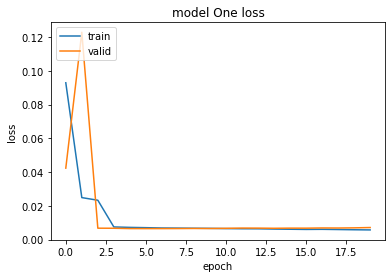

In [102]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()



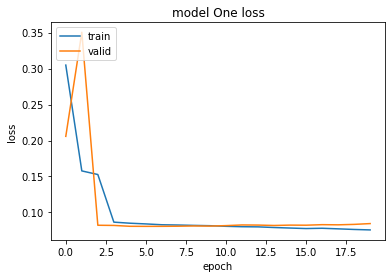

In [103]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

# Building the second model

In [104]:
model_2 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_2.add(embedding_layer)

model_2.add(LSTM(16, activation='tanh', return_sequences=True))
model_2.add(LSTM(16, activation='tanh'))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dense(1, activation= 'relu' ))
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [105]:
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 50)           1683500   
                                                                 
 lstm_2 (LSTM)               (None, 300, 16)           4288      
                                                                 
 lstm_3 (LSTM)               (None, 16)                2112      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,690,045
Trainable params: 6,545
Non-trainable params: 1,683,500
_________________________________________________________________
None


In [106]:
history = model_2.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 30)

Epoch 1/30
20/20 [==============================] - 9s 211ms/step - loss: 0.1006 - root_mean_squared_error: 0.3172 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2094
Epoch 2/30
20/20 [==============================] - 3s 161ms/step - loss: 0.0246 - root_mean_squared_error: 0.1567 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924
Epoch 3/30
20/20 [==============================] - 3s 160ms/step - loss: 0.0083 - root_mean_squared_error: 0.0911 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 4/30
20/20 [==============================] - 4s 179ms/step - loss: 0.0077 - root_mean_squared_error: 0.0878 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0806
Epoch 5/30
20/20 [==============================] - 3s 163ms/step - loss: 0.0073 - root_mean_squared_error: 0.0856 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 6/30
20/20 [==============================] - 3s 163ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0062 - val_

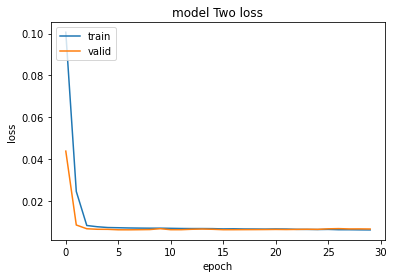

In [107]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()


Model Two with Drop Out

In [112]:
model_2 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_2.add(embedding_layer)

model_2.add(LSTM(16, activation='tanh', return_sequences=True))
model_2.add(Dropout(0.7))
model_2.add(LSTM(16, activation='tanh'))
model_2.add(Dropout(0.7))
model_2.add(Dense(8, activation='tanh'))
model_2.add(Dropout(0.6))
model_2.add(Dense(1, activation= 'relu' ))
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [113]:
history = model_Two.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 35)

Epoch 1/35
20/20 [==============================] - 9s 218ms/step - loss: 0.1631 - root_mean_squared_error: 0.4038 - val_loss: 0.0989 - val_root_mean_squared_error: 0.3145
Epoch 2/35
20/20 [==============================] - 3s 163ms/step - loss: 0.1132 - root_mean_squared_error: 0.3364 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2190
Epoch 3/35
20/20 [==============================] - 3s 163ms/step - loss: 0.1002 - root_mean_squared_error: 0.3166 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2070
Epoch 4/35
20/20 [==============================] - 3s 161ms/step - loss: 0.0847 - root_mean_squared_error: 0.2910 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1691
Epoch 5/35
20/20 [==============================] - 3s 171ms/step - loss: 0.0686 - root_mean_squared_error: 0.2620 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 6/35
20/20 [==============================] - 3s 166ms/step - loss: 0.0609 - root_mean_squared_error: 0.2469 - val_loss: 0.0168 - val_

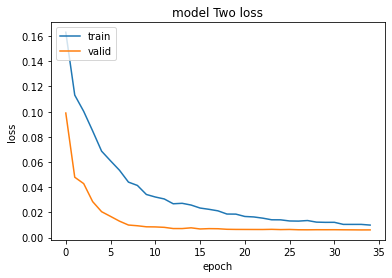

In [114]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

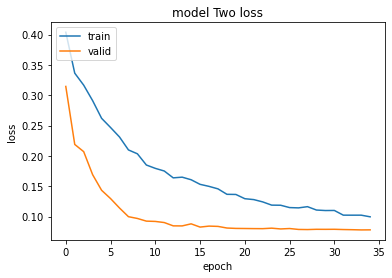

In [115]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model 2 rmse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [116]:
y_pred_test = model_Two.predict(X_test)

13/13 [==============================] - 2s 51ms/step


In [117]:
score = model_Two.evaluate(X_train, y_train, verbose=1)
score

50/50 [==============================] - 2s 45ms/step - loss: 0.0069 - root_mean_squared_error: 0.0833


[0.006936709862202406, 0.08328691124916077]

In [118]:
score = model_Two.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 1s 46ms/step - loss: 0.0081 - root_mean_squared_error: 0.0900


In [155]:
predictions_Model_Two = model_Two.predict(X_test)

13/13 [==============================] - 1s 46ms/step


Unnormalizing the price

In [ ]:
def unnormalize(price):
    price= price * (max_price-min_price) + min_price
    return price

unnorm_predictions_Model_Two = []
for pred in predictions_Model_Two:
    unnorm_predictions_Model_Two.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [162]:
mae(y_test, predictions_Model_Two)

0.06189746949298842

In [163]:
mae(unnorm_y_test,unnorm_predictions_Model_Two)

104.89082253972988

# Manually Hypertuning

# Building models with different learning rate 

In [129]:
model_3 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3.add(embedding_layer)

model_3.add(LSTM(8, activation='tanh', return_sequences=True))
model_3.add(LSTM(8, activation='tanh'))
model_3.add(Dense(16, activation='tanh'))
model_3.add(Dense(8, activation='tanh'))
model_3.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
model_3.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])


In [214]:
history = model_3.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 20)

Epoch 1/20
20/20 [==============================] - 10s 268ms/step - loss: 0.0291 - root_mean_squared_error: 0.1706 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878
Epoch 2/20
20/20 [==============================] - 3s 166ms/step - loss: 0.0080 - root_mean_squared_error: 0.0893 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0793
Epoch 3/20
20/20 [==============================] - 3s 163ms/step - loss: 0.0075 - root_mean_squared_error: 0.0865 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 4/20
20/20 [==============================] - 3s 161ms/step - loss: 0.0070 - root_mean_squared_error: 0.0834 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783
Epoch 5/20
20/20 [==============================] - 3s 167ms/step - loss: 0.0069 - root_mean_squared_error: 0.0834 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0808
Epoch 6/20
20/20 [==============================] - 3s 169ms/step - loss: 0.0069 - root_mean_squared_error: 0.0833 - val_loss: 0.0065 - val

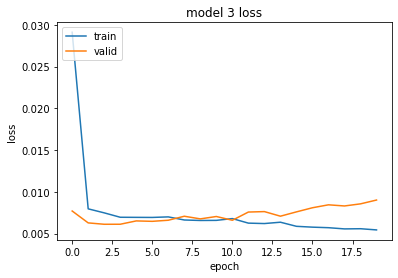

In [215]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

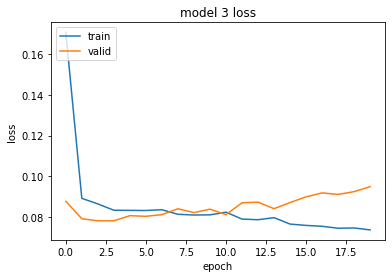

In [216]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])

plt.title('model 3 rmse')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [217]:
score = model_3.evaluate(X_train, y_train, verbose=1)
score

50/50 [==============================] - 2s 37ms/step - loss: 0.0067 - root_mean_squared_error: 0.0815


[0.006650163326412439, 0.0815485343337059]

In [218]:
score = model_3.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 0s 36ms/step - loss: 0.0105 - root_mean_squared_error: 0.1025


In [130]:
predictions = model_3.predict(X_test)

13/13 [==============================] - 2s 38ms/step


decreasing the learning rate

In [50]:
model_3_1 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_1.add(embedding_layer)

model_3_1.add(LSTM(8, activation='tanh', return_sequences=True))
model_3_1.add(LSTM(8, activation='tanh'))
model_3_1.add(Dense(16, activation='tanh'))
model_3_1.add(Dense(8, activation='tanh'))
model_3_1.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3_1.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [51]:
history = model_3_1.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 20)

Epoch 1/20
20/20 [==============================] - 9s 213ms/step - loss: 0.0813 - root_mean_squared_error: 0.2852 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1699
Epoch 2/20
20/20 [==============================] - 3s 162ms/step - loss: 0.0170 - root_mean_squared_error: 0.1306 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 3/20
20/20 [==============================] - 3s 163ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0818
Epoch 4/20
20/20 [==============================] - 3s 165ms/step - loss: 0.0077 - root_mean_squared_error: 0.0876 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0802
Epoch 5/20
20/20 [==============================] - 3s 162ms/step - loss: 0.0073 - root_mean_squared_error: 0.0856 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 6/20
20/20 [==============================] - 3s 163ms/step - loss: 0.0073 - root_mean_squared_error: 0.0853 - val_loss: 0.0064 - val_

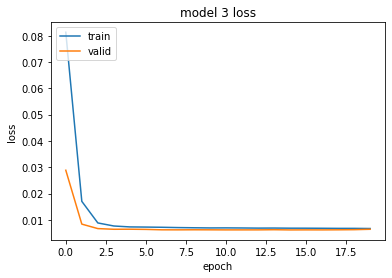

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

decreasing the learning rate

In [226]:
model_3_2 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_2.add(embedding_layer)

model_3_2.add(LSTM(8, activation='tanh', return_sequences=True))
model_3_2.add(LSTM(8, activation='tanh'))
model_3_2.add(Dense(16, activation='tanh'))
model_3_2.add(Dense(8, activation='tanh'))
model_3_2.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_2.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [227]:
history = model_3_2.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 20)

Epoch 1/20
20/20 [==============================] - 10s 213ms/step - loss: 0.1961 - root_mean_squared_error: 0.4429 - val_loss: 0.1813 - val_root_mean_squared_error: 0.4257
Epoch 2/20
20/20 [==============================] - 3s 166ms/step - loss: 0.1753 - root_mean_squared_error: 0.4187 - val_loss: 0.1597 - val_root_mean_squared_error: 0.3996
Epoch 3/20
20/20 [==============================] - 3s 163ms/step - loss: 0.1533 - root_mean_squared_error: 0.3916 - val_loss: 0.1376 - val_root_mean_squared_error: 0.3710
Epoch 4/20
20/20 [==============================] - 3s 163ms/step - loss: 0.1316 - root_mean_squared_error: 0.3628 - val_loss: 0.1158 - val_root_mean_squared_error: 0.3403
Epoch 5/20
20/20 [==============================] - 3s 164ms/step - loss: 0.1101 - root_mean_squared_error: 0.3317 - val_loss: 0.0945 - val_root_mean_squared_error: 0.3074
Epoch 6/20
20/20 [==============================] - 3s 165ms/step - loss: 0.0891 - root_mean_squared_error: 0.2985 - val_loss: 0.0738 - val

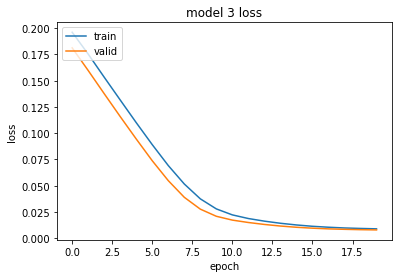

In [228]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

Increasring the number of epoch without any other changes

In [237]:
model_3_2 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_2.add(embedding_layer)

model_3_2.add(LSTM(8, activation='tanh', return_sequences=True))
model_3_2.add(LSTM(8, activation='tanh'))
model_3_2.add(Dense(16, activation='tanh'))
model_3_2.add(Dense(8, activation='tanh'))
model_3_2.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_2.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [238]:
history = model_3_2.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 30)

Epoch 1/30
20/20 [==============================] - 9s 212ms/step - loss: 0.2011 - root_mean_squared_error: 0.4484 - val_loss: 0.1859 - val_root_mean_squared_error: 0.4311
Epoch 2/30
20/20 [==============================] - 3s 165ms/step - loss: 0.1724 - root_mean_squared_error: 0.4152 - val_loss: 0.1502 - val_root_mean_squared_error: 0.3875
Epoch 3/30
20/20 [==============================] - 3s 162ms/step - loss: 0.1295 - root_mean_squared_error: 0.3598 - val_loss: 0.1020 - val_root_mean_squared_error: 0.3194
Epoch 4/30
20/20 [==============================] - 3s 163ms/step - loss: 0.0824 - root_mean_squared_error: 0.2871 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2407
Epoch 5/30
20/20 [==============================] - 3s 170ms/step - loss: 0.0500 - root_mean_squared_error: 0.2235 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1888
Epoch 6/30
20/20 [==============================] - 3s 164ms/step - loss: 0.0352 - root_mean_squared_error: 0.1876 - val_loss: 0.0276 - val_

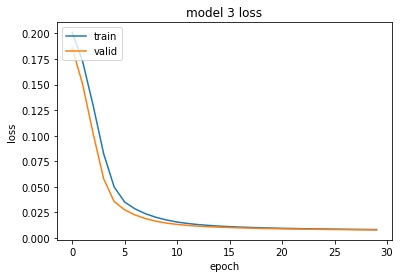

In [239]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [252]:
score = model_3_2.evaluate(X_train, y_train, verbose=1)
score

50/50 [==============================] - 2s 37ms/step - loss: 0.0079 - root_mean_squared_error: 0.0887


[0.007874488830566406, 0.08873831480741501]

In [253]:
score = model_3_2.evaluate(X_test, y_test, verbose=1)
score

13/13 [==============================] - 0s 36ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984


[0.009683024138212204, 0.09840235859155655]

In [258]:
predictions = model_3_2.predict(X_test)

13/13 [==============================] - 0s 36ms/step


In [259]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [260]:
mae(y_test, predictions)


0.07057918976024143

In [261]:
mae(unnorm_y_test,unnorm_predictions)

119.60277920184915

In [56]:
model_3_22 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_22.add(embedding_layer)

model_3_22.add(LSTM(8, activation='tanh', return_sequences=True))
model_3_22.add(LSTM(8, activation='tanh'))
model_3_22.add(Dense(16, activation='tanh'))
model_3_22.add(Dense(8, activation='tanh'))
model_3_22.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_22.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [57]:
history = model_3_22.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 40)

Epoch 1/40
20/20 [==============================] - 9s 212ms/step - loss: 0.1988 - root_mean_squared_error: 0.4459 - val_loss: 0.1807 - val_root_mean_squared_error: 0.4251
Epoch 2/40
20/20 [==============================] - 3s 163ms/step - loss: 0.1684 - root_mean_squared_error: 0.4104 - val_loss: 0.1463 - val_root_mean_squared_error: 0.3825
Epoch 3/40
20/20 [==============================] - 3s 160ms/step - loss: 0.1303 - root_mean_squared_error: 0.3610 - val_loss: 0.1093 - val_root_mean_squared_error: 0.3306
Epoch 4/40
20/20 [==============================] - 3s 160ms/step - loss: 0.0968 - root_mean_squared_error: 0.3112 - val_loss: 0.0795 - val_root_mean_squared_error: 0.2820
Epoch 5/40
20/20 [==============================] - 3s 174ms/step - loss: 0.0718 - root_mean_squared_error: 0.2680 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2413
Epoch 6/40
20/20 [==============================] - 3s 161ms/step - loss: 0.0545 - root_mean_squared_error: 0.2334 - val_loss: 0.0441 - val_

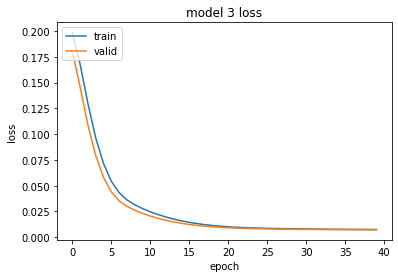

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

Increasing the output of vector of LSTM (8 to 12)

In [59]:
model_3_2_1 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_2_1.add(embedding_layer)

model_3_2_1.add(LSTM(12, activation='tanh', return_sequences=True))
model_3_2_1.add(LSTM(12, activation='tanh'))
model_3_2_1.add(Dense(16, activation='tanh'))
model_3_2_1.add(Dense(8, activation='tanh'))
model_3_2_1.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_2_1.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [60]:
history = model_3_2_1.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 40)

Epoch 1/40
20/20 [==============================] - 9s 209ms/step - loss: 0.1373 - root_mean_squared_error: 0.3706 - val_loss: 0.0982 - val_root_mean_squared_error: 0.3134
Epoch 2/40
20/20 [==============================] - 3s 160ms/step - loss: 0.0863 - root_mean_squared_error: 0.2938 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2488
Epoch 3/40
20/20 [==============================] - 3s 160ms/step - loss: 0.0591 - root_mean_squared_error: 0.2431 - val_loss: 0.0466 - val_root_mean_squared_error: 0.2159
Epoch 4/40
20/20 [==============================] - 3s 161ms/step - loss: 0.0462 - root_mean_squared_error: 0.2150 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1919
Epoch 5/40
20/20 [==============================] - 3s 169ms/step - loss: 0.0363 - root_mean_squared_error: 0.1904 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 6/40
20/20 [==============================] - 3s 158ms/step - loss: 0.0284 - root_mean_squared_error: 0.1685 - val_loss: 0.0224 - val_

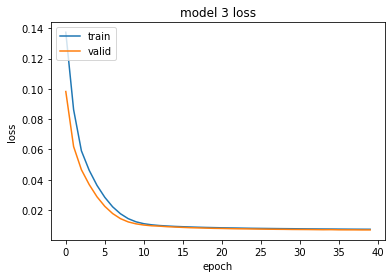

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [62]:
predictions = model_3_2_1.predict(X_test)

13/13 [==============================] - 1s 40ms/step


In [58]:
def unnormalize(price):
    price= price * (max_price-min_price) + min_price
    return price

unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [59]:
mae(unnorm_y_test,unnorm_predictions)

324.4049151974717

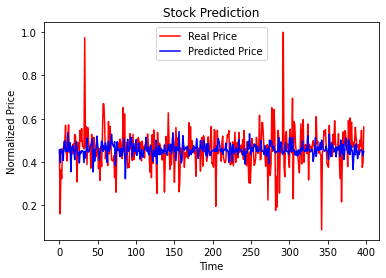

In [63]:
plt.plot(list(y_test), color = 'red', label = 'Real Price')
plt.plot(list(predictions), color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

Increasing the output of vector of LSTM (12 to 16)

In [64]:
model_3_2_2 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_2_2.add(embedding_layer)

model_3_2_2.add(LSTM(16, activation='tanh', return_sequences=True))
model_3_2_2.add(LSTM(16, activation='tanh'))
model_3_2_2.add(Dense(16, activation='tanh'))
model_3_2_2.add(Dense(8, activation='tanh'))
model_3_2_2.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_2_2.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [65]:
history = model_3_2_2.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 40)

Epoch 1/40
20/20 [==============================] - 9s 213ms/step - loss: 0.1591 - root_mean_squared_error: 0.3989 - val_loss: 0.1239 - val_root_mean_squared_error: 0.3520
Epoch 2/40
20/20 [==============================] - 3s 158ms/step - loss: 0.1050 - root_mean_squared_error: 0.3240 - val_loss: 0.0778 - val_root_mean_squared_error: 0.2790
Epoch 3/40
20/20 [==============================] - 3s 157ms/step - loss: 0.0708 - root_mean_squared_error: 0.2660 - val_loss: 0.0538 - val_root_mean_squared_error: 0.2319
Epoch 4/40
20/20 [==============================] - 3s 160ms/step - loss: 0.0538 - root_mean_squared_error: 0.2319 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2057
Epoch 5/40
20/20 [==============================] - 3s 175ms/step - loss: 0.0437 - root_mean_squared_error: 0.2091 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 6/40
20/20 [==============================] - 3s 158ms/step - loss: 0.0353 - root_mean_squared_error: 0.1878 - val_loss: 0.0268 - val_

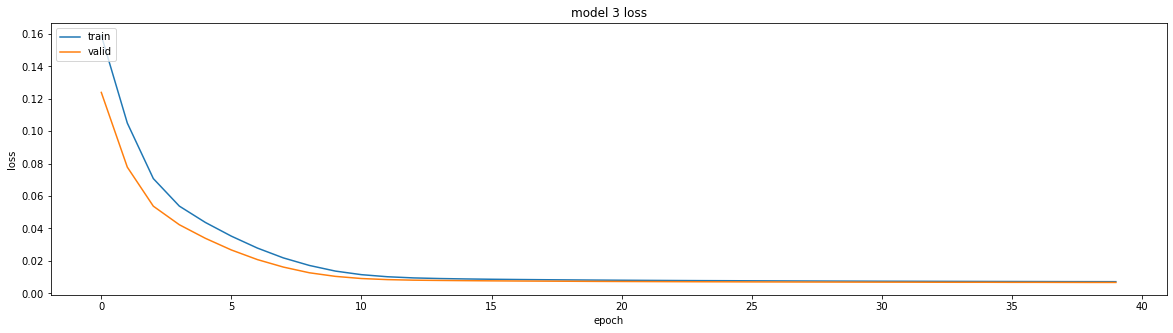

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [67]:
predictions = model_3_2_2.predict(X_test)

13/13 [==============================] - 1s 43ms/step


In [274]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [275]:
mae(unnorm_y_test,unnorm_predictions)

103.50814957300175

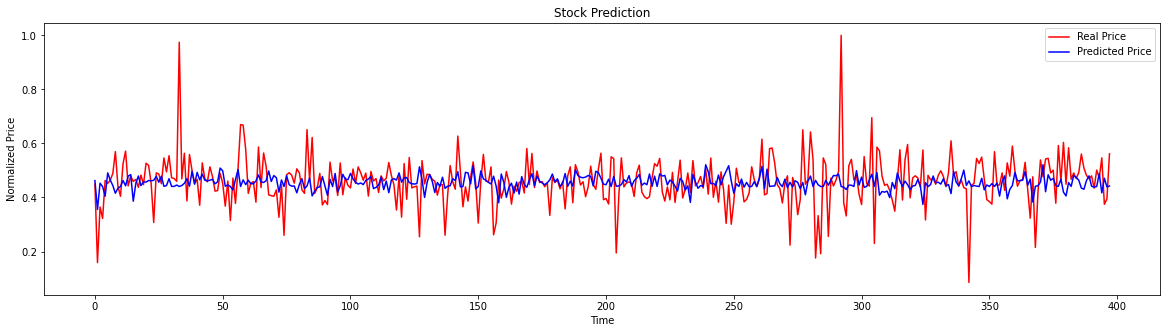

In [68]:
plt.plot(list(y_test), color = 'red', label = 'Real Price')
plt.plot(list(predictions), color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

Increasing the output of vector of LSTM (16 to 20)

In [276]:
model_3_2_3 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_2_3.add(embedding_layer)

model_3_2_3.add(LSTM(20, activation='tanh', return_sequences=True))
model_3_2_3.add(LSTM(20, activation='tanh'))
model_3_2_3.add(Dense(16, activation='tanh'))
model_3_2_3.add(Dense(8, activation='tanh'))
model_3_2_3.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_2_3.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [279]:
history = model_3_2_3.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 30)


Epoch 1/30
20/20 [==============================] - 10s 286ms/step - loss: 0.1941 - root_mean_squared_error: 0.4406 - val_loss: 0.1556 - val_root_mean_squared_error: 0.3945
Epoch 2/30
20/20 [==============================] - 3s 168ms/step - loss: 0.1277 - root_mean_squared_error: 0.3574 - val_loss: 0.0914 - val_root_mean_squared_error: 0.3023
Epoch 3/30
20/20 [==============================] - 3s 172ms/step - loss: 0.0791 - root_mean_squared_error: 0.2813 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2406
Epoch 4/30
20/20 [==============================] - 3s 171ms/step - loss: 0.0557 - root_mean_squared_error: 0.2361 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2094
Epoch 5/30
20/20 [==============================] - 3s 175ms/step - loss: 0.0447 - root_mean_squared_error: 0.2114 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1904
Epoch 6/30
20/20 [==============================] - 3s 173ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - val_loss: 0.0293 - val

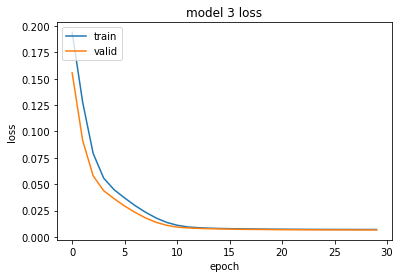

In [280]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [282]:
predictions = model_3_2_3.predict(X_test)

13/13 [==============================] - 1s 47ms/step


In [283]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [284]:
mae(unnorm_y_test,unnorm_predictions)

102.95162703109304

Using batch normalization

In [407]:
model_3_B = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_B.add(embedding_layer)

model_3_B.add(LSTM(20, activation='tanh', return_sequences=True))
model_3_B.add(BatchNormalization())
model_3_B.add(LSTM(20, activation='tanh'))
model_3_B.add(BatchNormalization())
model_3_B.add(Dense(16, activation='tanh'))
model_3_B.add(BatchNormalization())
model_3_B.add(Dense(8, activation='tanh'))
model_3_B.add(BatchNormalization())
model_3_B.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_B.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [408]:
history = model_3_B.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 150)

Epoch 1/150
20/20 [==============================] - 10s 219ms/step - loss: 1.0048 - root_mean_squared_error: 1.0024 - val_loss: 0.1335 - val_root_mean_squared_error: 0.3653
Epoch 2/150
20/20 [==============================] - 4s 194ms/step - loss: 0.6437 - root_mean_squared_error: 0.8023 - val_loss: 0.1393 - val_root_mean_squared_error: 0.3732
Epoch 3/150
20/20 [==============================] - 4s 213ms/step - loss: 0.4922 - root_mean_squared_error: 0.7015 - val_loss: 0.1550 - val_root_mean_squared_error: 0.3937
Epoch 4/150
20/20 [==============================] - 4s 222ms/step - loss: 0.4122 - root_mean_squared_error: 0.6420 - val_loss: 0.1595 - val_root_mean_squared_error: 0.3994
Epoch 5/150
20/20 [==============================] - 3s 171ms/step - loss: 0.3505 - root_mean_squared_error: 0.5920 - val_loss: 0.1645 - val_root_mean_squared_error: 0.4056
Epoch 6/150
20/20 [==============================] - 4s 182ms/step - loss: 0.3094 - root_mean_squared_error: 0.5562 - val_loss: 0.1669

20/20 [==============================] - 3s 166ms/step - loss: 0.0774 - root_mean_squared_error: 0.2782 - val_loss: 0.0879 - val_root_mean_squared_error: 0.2964
Epoch 96/150
20/20 [==============================] - 3s 172ms/step - loss: 0.0758 - root_mean_squared_error: 0.2752 - val_loss: 0.0864 - val_root_mean_squared_error: 0.2940
Epoch 97/150
20/20 [==============================] - 4s 180ms/step - loss: 0.0732 - root_mean_squared_error: 0.2705 - val_loss: 0.0855 - val_root_mean_squared_error: 0.2924
Epoch 98/150
20/20 [==============================] - 3s 165ms/step - loss: 0.0770 - root_mean_squared_error: 0.2774 - val_loss: 0.0863 - val_root_mean_squared_error: 0.2938
Epoch 99/150
20/20 [==============================] - 3s 169ms/step - loss: 0.0721 - root_mean_squared_error: 0.2685 - val_loss: 0.0862 - val_root_mean_squared_error: 0.2936
Epoch 100/150
20/20 [==============================] - 3s 166ms/step - loss: 0.0707 - root_mean_squared_error: 0.2659 - val_loss: 0.0877 - val_

Epoch 142/150
20/20 [==============================] - 4s 184ms/step - loss: 0.0622 - root_mean_squared_error: 0.2495 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2837
Epoch 143/150
20/20 [==============================] - 3s 175ms/step - loss: 0.0655 - root_mean_squared_error: 0.2559 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2830
Epoch 144/150
20/20 [==============================] - 3s 166ms/step - loss: 0.0653 - root_mean_squared_error: 0.2556 - val_loss: 0.0788 - val_root_mean_squared_error: 0.2807
Epoch 145/150
20/20 [==============================] - 3s 168ms/step - loss: 0.0650 - root_mean_squared_error: 0.2550 - val_loss: 0.0804 - val_root_mean_squared_error: 0.2835
Epoch 146/150
20/20 [==============================] - 3s 170ms/step - loss: 0.0653 - root_mean_squared_error: 0.2555 - val_loss: 0.0798 - val_root_mean_squared_error: 0.2824
Epoch 147/150
20/20 [==============================] - 4s 200ms/step - loss: 0.0633 - root_mean_squared_error: 0.2516 - val_l

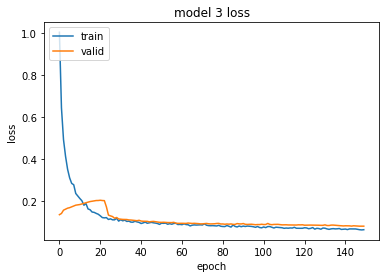

In [409]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [410]:
predictions = model_3_B.predict(X_test)

13/13 [==============================] - 2s 50ms/step


In [411]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [412]:
mae(unnorm_y_test,unnorm_predictions)

383.5995650946823

Increasing the output of vector of LSTM (20 to 24)

In [96]:
model_3_2_4 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_2_4.add(embedding_layer)

model_3_2_4.add(LSTM(24, activation='tanh', return_sequences=True))
model_3_2_4.add(LSTM(24, activation='tanh'))
model_3_2_4.add(Dense(16, activation='tanh'))
model_3_2_4.add(Dense(8, activation='tanh'))
model_3_2_4.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_3_2_4.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [97]:
history = model_3_2_4.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 30)


Epoch 1/30
20/20 [==============================] - 9s 232ms/step - loss: 0.1759 - root_mean_squared_error: 0.4194 - val_loss: 0.1288 - val_root_mean_squared_error: 0.3589
Epoch 2/30
20/20 [==============================] - 3s 169ms/step - loss: 0.1074 - root_mean_squared_error: 0.3277 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2753
Epoch 3/30
20/20 [==============================] - 4s 175ms/step - loss: 0.0719 - root_mean_squared_error: 0.2682 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2428
Epoch 4/30
20/20 [==============================] - 3s 169ms/step - loss: 0.0588 - root_mean_squared_error: 0.2425 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200
Epoch 5/30
20/20 [==============================] - 3s 174ms/step - loss: 0.0480 - root_mean_squared_error: 0.2191 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1961
Epoch 6/30
20/20 [==============================] - 4s 192ms/step - loss: 0.0385 - root_mean_squared_error: 0.1962 - val_loss: 0.0302 - val_

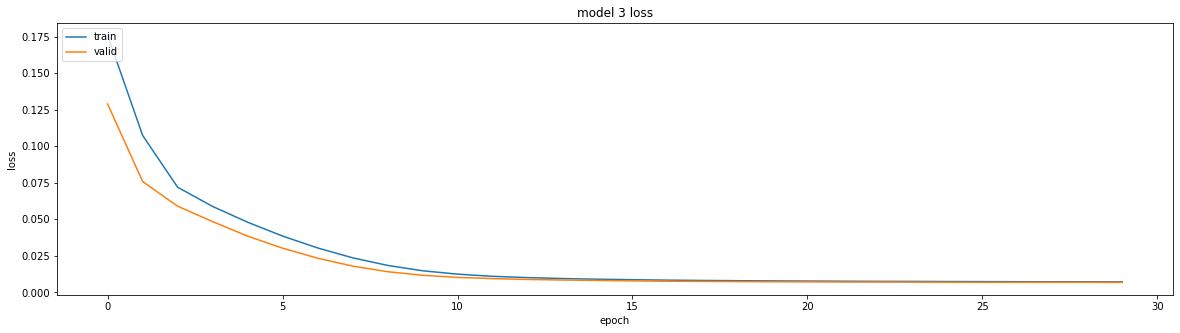

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [99]:
predictions = model_3_2_4.predict(X_test)

13/13 [==============================] - 2s 49ms/step


In [100]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [101]:
mae(unnorm_y_test,unnorm_predictions)

112.09739969432117

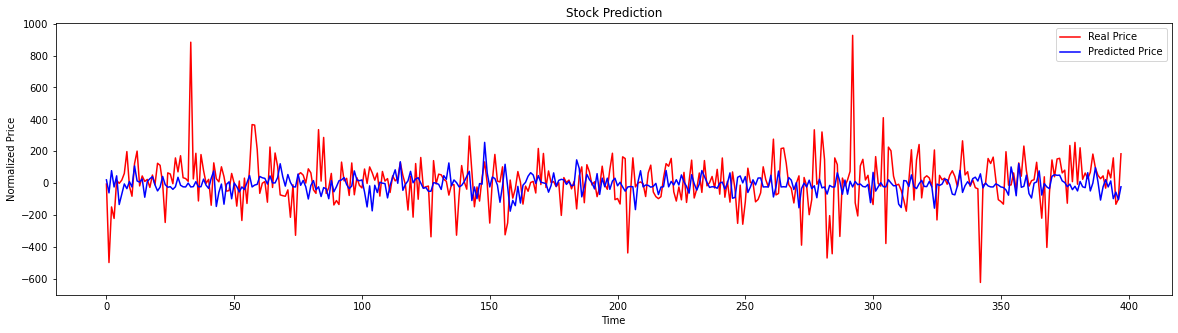

In [102]:
plt.plot(unnorm_y_test, color = 'red', label = 'Real Price')
plt.plot(unnorm_predictions, color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

# Test another Hyperparameters

In [50]:
modelz = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
modelz.add(embedding_layer)

modelz.add(LSTM(24, activation='relu', return_sequences=True))
modelz.add(LSTM(24, activation='relu'))
modelz.add(Dense(16, activation='relu'))
modelz.add(Dense(16, activation='relu'))
modelz.add(Dense(12, activation='relu'))
modelz.add(Dense(8, activation='relu'))
modelz.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
modelz.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [51]:
history = modelz.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 30)


Epoch 1/30
20/20 [==============================] - 9s 223ms/step - loss: 0.2039 - root_mean_squared_error: 0.4516 - val_loss: 0.1932 - val_root_mean_squared_error: 0.4396
Epoch 2/30
20/20 [==============================] - 4s 185ms/step - loss: 0.1903 - root_mean_squared_error: 0.4363 - val_loss: 0.1751 - val_root_mean_squared_error: 0.4184
Epoch 3/30
20/20 [==============================] - 4s 197ms/step - loss: 0.1675 - root_mean_squared_error: 0.4092 - val_loss: 0.1460 - val_root_mean_squared_error: 0.3821
Epoch 4/30
20/20 [==============================] - 4s 199ms/step - loss: 0.1466 - root_mean_squared_error: 0.3828 - val_loss: 0.1272 - val_root_mean_squared_error: 0.3566
Epoch 5/30
20/20 [==============================] - 4s 190ms/step - loss: 0.1310 - root_mean_squared_error: 0.3619 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3290
Epoch 6/30
20/20 [==============================] - 4s 183ms/step - loss: 0.1083 - root_mean_squared_error: 0.3291 - val_loss: 0.0951 - val_

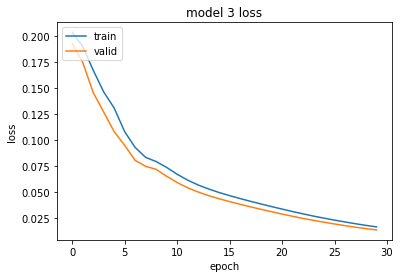

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [55]:
predictions = modelz.predict(X_test)

13/13 [==============================] - 1s 48ms/step


In [57]:
predictions.shape

(398, 1)

In [61]:
predictions

array([[0.59243095],
       [0.40615764],
       [0.49478063],
       [0.32083645],
       [0.45264986],
       [0.49756715],
       [0.41921487],
       [0.42207834],
       [0.5138448 ],
       [0.32203048],
       [0.32083645],
       [0.47030118],
       [0.4753166 ],
       [0.39533874],
       [0.38085443],
       [0.40794164],
       [0.35792556],
       [0.444881  ],
       [0.49306905],
       [0.32520783],
       [0.45131996],
       [0.44801998],
       [0.48285314],
       [0.3285298 ],
       [0.522076  ],
       [0.46736404],
       [0.47581825],
       [0.32082605],
       [0.41359618],
       [0.40429536],
       [0.32081679],
       [0.32083598],
       [0.46712503],
       [0.32083645],
       [0.44681534],
       [0.32292864],
       [0.46681806],
       [0.32081237],
       [0.44573447],
       [0.32109743],
       [0.4084414 ],
       [0.36520347],
       [0.3604649 ],
       [0.53616375],
       [0.47705632],
       [0.32493332],
       [0.46204248],
       [0.321

In [62]:
y_test

1251    0.449737
757     0.159265
1379    0.365009
70      0.322521
1206    0.463021
          ...   
904     0.472480
261     0.546657
514     0.374805
1220    0.394591
240     0.561694
Name: Norm_Price, Length: 398, dtype: float64

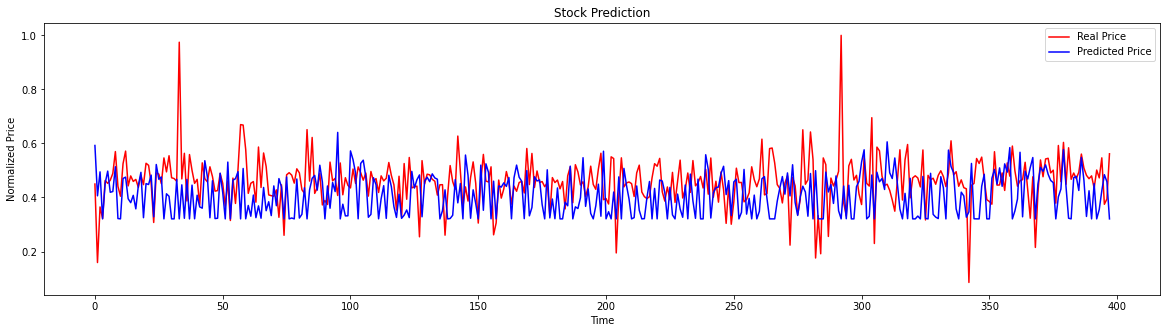

In [84]:

plt.plot(list(y_test), color = 'red', label = 'Real Price')
plt.plot(list(predictions), color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

In [82]:
type(list(y_test))

list

In [70]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [74]:
def unnormalize(price):
    price= price * (max_price-min_price) + min_price
    return price

unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [79]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

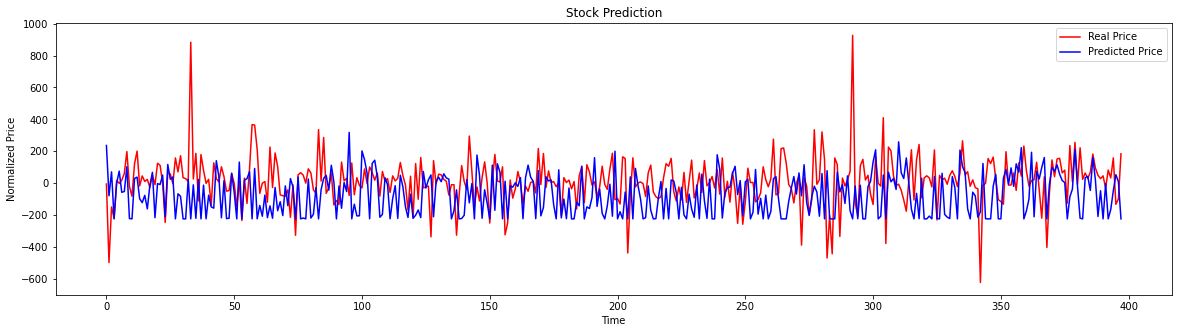

In [78]:
plt.plot(unnorm_y_test, color = 'red', label = 'Real Price')
plt.plot(unnorm_predictions, color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

Using 20 for LSTM without BN and adding nodes to dense layer

In [89]:
model_4 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_4.add(embedding_layer)

model_4.add(LSTM(20, activation='tanh', return_sequences=True))
model_4.add(LSTM(20, activation='tanh'))
model_4.add(Dense(20, activation='tanh'))
model_4.add(Dense(12, activation='tanh'))
model_4.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_4.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [90]:
history = model_4.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 30)


Epoch 1/30
20/20 [==============================] - 9s 212ms/step - loss: 0.2136 - root_mean_squared_error: 0.4622 - val_loss: 0.2065 - val_root_mean_squared_error: 0.4544
Epoch 2/30
20/20 [==============================] - 3s 163ms/step - loss: 0.2046 - root_mean_squared_error: 0.4523 - val_loss: 0.1915 - val_root_mean_squared_error: 0.4377
Epoch 3/30
20/20 [==============================] - 3s 174ms/step - loss: 0.1800 - root_mean_squared_error: 0.4242 - val_loss: 0.1544 - val_root_mean_squared_error: 0.3930
Epoch 4/30
20/20 [==============================] - 3s 173ms/step - loss: 0.1180 - root_mean_squared_error: 0.3435 - val_loss: 0.0643 - val_root_mean_squared_error: 0.2535
Epoch 5/30
20/20 [==============================] - 3s 163ms/step - loss: 0.0466 - root_mean_squared_error: 0.2160 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1813
Epoch 6/30
20/20 [==============================] - 3s 163ms/step - loss: 0.0323 - root_mean_squared_error: 0.1798 - val_loss: 0.0253 - val_

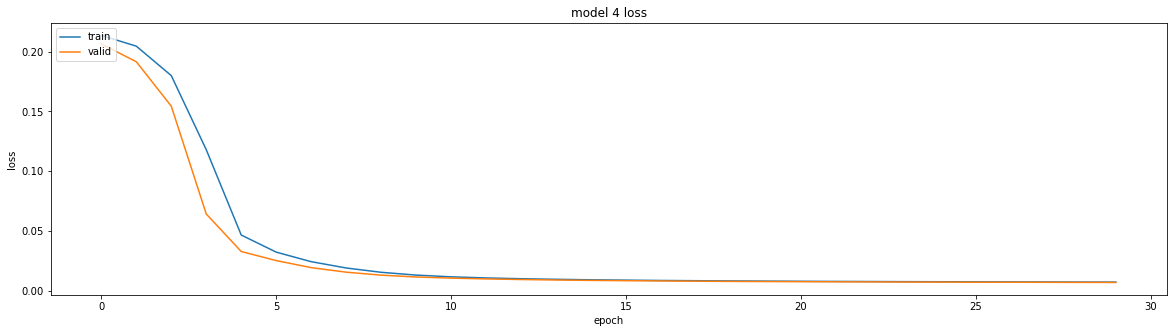

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [92]:
predictions = model_4.predict(X_test)

13/13 [==============================] - 2s 46ms/step


In [93]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))


In [94]:
mse(unnorm_y_test,unnorm_predictions)

25360.14203172514

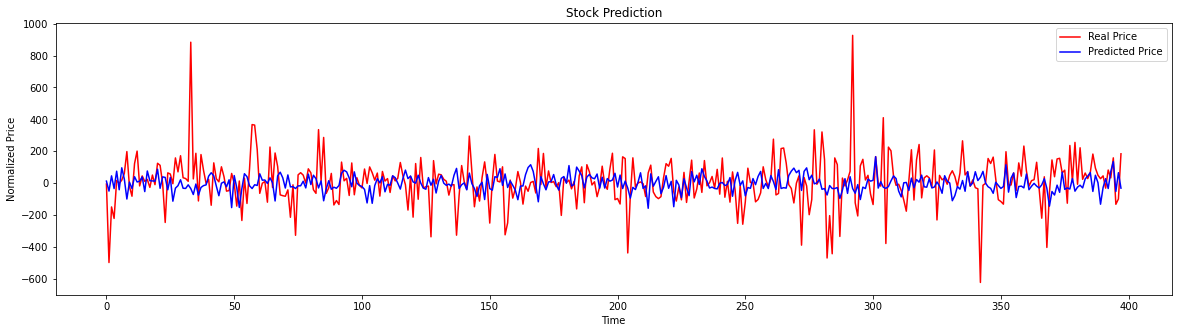

In [95]:
plt.plot(unnorm_y_test, color = 'red', label = 'Real Price')
plt.plot(unnorm_predictions, color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

Adding layer and nodes to the last model

In [76]:
model_5 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_5.add(embedding_layer)

model_5.add(LSTM(20, activation='tanh', return_sequences=True))
model_5.add(LSTM(20, activation='tanh'))
model_5.add(Dense(20, activation='tanh'))
model_5.add(Dense(16, activation='tanh'))
model_5.add(Dense(8, activation='tanh'))
model_5.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_5.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [77]:
history = model_5.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 30)


Epoch 1/30
20/20 [==============================] - 9s 231ms/step - loss: 0.1846 - root_mean_squared_error: 0.4296 - val_loss: 0.1386 - val_root_mean_squared_error: 0.3723
Epoch 2/30
20/20 [==============================] - 3s 164ms/step - loss: 0.1050 - root_mean_squared_error: 0.3240 - val_loss: 0.0614 - val_root_mean_squared_error: 0.2479
Epoch 3/30
20/20 [==============================] - 3s 164ms/step - loss: 0.0567 - root_mean_squared_error: 0.2381 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2107
Epoch 4/30
20/20 [==============================] - 4s 178ms/step - loss: 0.0448 - root_mean_squared_error: 0.2116 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1862
Epoch 5/30
20/20 [==============================] - 3s 166ms/step - loss: 0.0350 - root_mean_squared_error: 0.1870 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 6/30
20/20 [==============================] - 3s 166ms/step - loss: 0.0273 - root_mean_squared_error: 0.1652 - val_loss: 0.0209 - val_

In [78]:
predictions = model_5.predict(X_test)

13/13 [==============================] - 2s 49ms/step


In [79]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))


In [84]:
mse(unnorm_y_test,unnorm_predictions)

25641.531363771846

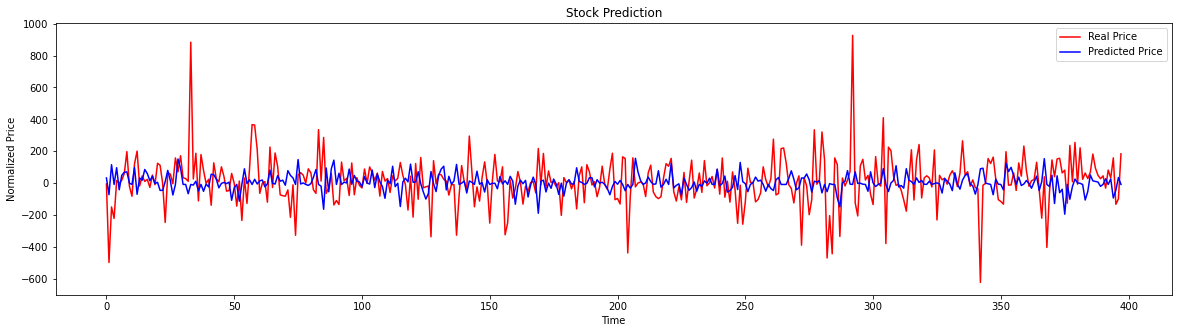

In [81]:
plt.plot(unnorm_y_test, color = 'red', label = 'Real Price')
plt.plot(unnorm_predictions, color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

Decreasing the learning rate for the last time

In [51]:
model_3_3 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_3_3.add(embedding_layer)

model_3_3.add(LSTM(8, activation='tanh', return_sequences=True))
model_3_3.add(LSTM(8, activation='tanh'))
model_3_3.add(Dense(16, activation='tanh'))
model_3_3.add(Dense(8, activation='tanh'))
model_3_3.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model_3_3.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [52]:
history = model_3_3.fit(X_train, y_train, validation_split=0.2,
                            batch_size = 64, epochs = 40)

Epoch 1/40
20/20 [==============================] - 9s 221ms/step - loss: 0.1414 - root_mean_squared_error: 0.3761 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3706
Epoch 2/40
20/20 [==============================] - 3s 163ms/step - loss: 0.1375 - root_mean_squared_error: 0.3708 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3652
Epoch 3/40
20/20 [==============================] - 3s 163ms/step - loss: 0.1336 - root_mean_squared_error: 0.3655 - val_loss: 0.1295 - val_root_mean_squared_error: 0.3598
Epoch 4/40
20/20 [==============================] - 3s 163ms/step - loss: 0.1299 - root_mean_squared_error: 0.3604 - val_loss: 0.1257 - val_root_mean_squared_error: 0.3545
Epoch 5/40
20/20 [==============================] - 3s 162ms/step - loss: 0.1262 - root_mean_squared_error: 0.3553 - val_loss: 0.1219 - val_root_mean_squared_error: 0.3492
Epoch 6/40
20/20 [==============================] - 3s 170ms/step - loss: 0.1226 - root_mean_squared_error: 0.3502 - val_loss: 0.1183 - val_

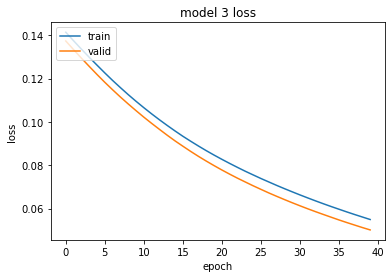

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [86]:
predictions = model_3_3.predict(X_test)

13/13 [==============================] - 0s 36ms/step


In [87]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))


In [88]:
mse(unnorm_y_test,unnorm_predictions)

148911.4791964992

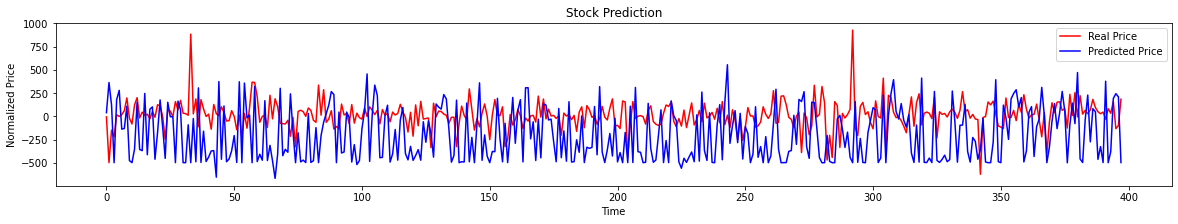

In [75]:
plt.plot(unnorm_y_test, color = 'red', label = 'Real Price')
plt.plot(unnorm_predictions, color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

new test for the best model by changing the tanh to relu

In [49]:
model_T = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_T.add(embedding_layer)

model_T.add(LSTM(20, activation='relu', return_sequences=True))
model_T.add(LSTM(20, activation='relu'))
model_T.add(Dense(16, activation='relu'))
model_T.add(Dense(8, activation='relu'))
model_T.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_T.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [51]:
history = model_T.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 30)

Epoch 1/30
20/20 [==============================] - 9s 205ms/step - loss: 0.2124 - root_mean_squared_error: 0.4609 - val_loss: 0.2052 - val_root_mean_squared_error: 0.4530
Epoch 2/30
20/20 [==============================] - 3s 172ms/step - loss: 0.2065 - root_mean_squared_error: 0.4544 - val_loss: 0.1954 - val_root_mean_squared_error: 0.4420
Epoch 3/30
20/20 [==============================] - 3s 175ms/step - loss: 0.1832 - root_mean_squared_error: 0.4280 - val_loss: 0.1514 - val_root_mean_squared_error: 0.3891
Epoch 4/30
20/20 [==============================] - 4s 179ms/step - loss: 0.1318 - root_mean_squared_error: 0.3630 - val_loss: 0.1046 - val_root_mean_squared_error: 0.3234
Epoch 5/30
20/20 [==============================] - 4s 182ms/step - loss: 0.0966 - root_mean_squared_error: 0.3108 - val_loss: 0.0834 - val_root_mean_squared_error: 0.2887
Epoch 6/30
20/20 [==============================] - 4s 184ms/step - loss: 0.0854 - root_mean_squared_error: 0.2923 - val_loss: 0.0772 - val_

In [ ]:
# back to tanh and adding one LSTM layer 

In [58]:
model_T1 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_T1.add(embedding_layer)

model_T1.add(LSTM(20, activation='tanh', return_sequences=True))
model_T1.add(LSTM(20, activation='tanh', return_sequences=True))
model_T1.add(LSTM(16, activation='tanh'))
model_T1.add(Dense(16, activation='tanh'))
model_T1.add(Dense(8, activation='tanh'))
model_T1.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_T1.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [59]:
history = model_T1.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 40)

Epoch 1/40
20/20 [==============================] - 14s 333ms/step - loss: 0.1285 - root_mean_squared_error: 0.3585 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2928
Epoch 2/40
20/20 [==============================] - 5s 249ms/step - loss: 0.0712 - root_mean_squared_error: 0.2668 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2213
Epoch 3/40
20/20 [==============================] - 5s 269ms/step - loss: 0.0477 - root_mean_squared_error: 0.2184 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1900
Epoch 4/40
20/20 [==============================] - 5s 252ms/step - loss: 0.0357 - root_mean_squared_error: 0.1889 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 5/40
20/20 [==============================] - 5s 254ms/step - loss: 0.0262 - root_mean_squared_error: 0.1618 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1391
Epoch 6/40
20/20 [==============================] - 5s 264ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - val_loss: 0.0143 - val

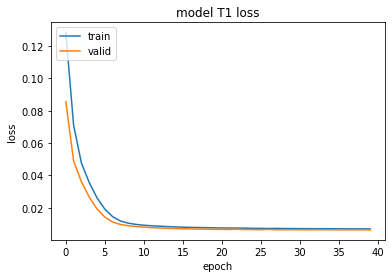

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model T1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [123]:
predictions = model_T1.predict(X_test)

13/13 [==============================] - 3s 67ms/step


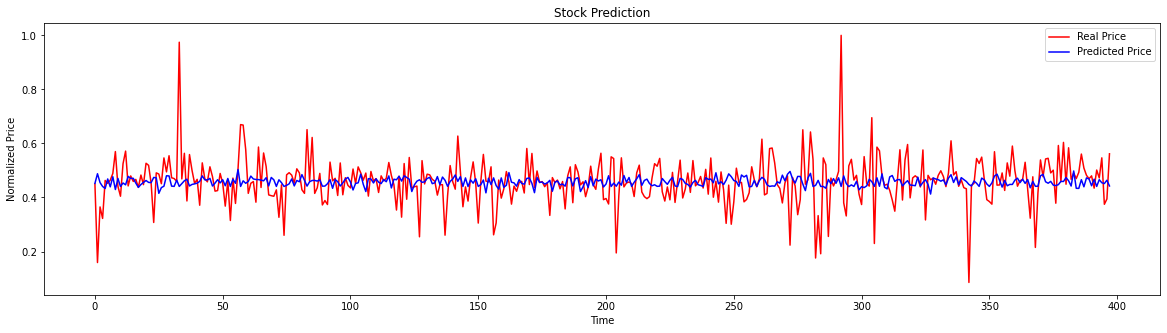

In [125]:
plt.plot(list(y_test), color = 'red', label = 'Real Price')
plt.plot(list(predictions), color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

In [ ]:
#addidng 2 dense layer

In [63]:
model_T2 = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_T2.add(embedding_layer)

model_T2.add(LSTM(20, activation='tanh', return_sequences=True))
model_T2.add(LSTM(20, activation='tanh', return_sequences=True))
model_T2.add(LSTM(16, activation='tanh'))
model_T2.add(Dense(16, activation='tanh'))
model_T2.add(Dense(12, activation='tanh'))
model_T2.add(Dense(8, activation='tanh'))
model_T2.add(Dense(4, activation='tanh'))
model_T2.add(Dense(1, activation= 'relu' ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model_T2.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [64]:
history = model_T2.fit(X_train, y_train, validation_split=0.2, batch_size = 64, epochs = 40)

Epoch 1/40
20/20 [==============================] - 13s 318ms/step - loss: 0.1200 - root_mean_squared_error: 0.3464 - val_loss: 0.0798 - val_root_mean_squared_error: 0.2825
Epoch 2/40
20/20 [==============================] - 5s 266ms/step - loss: 0.0687 - root_mean_squared_error: 0.2621 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2168
Epoch 3/40
20/20 [==============================] - 5s 245ms/step - loss: 0.0466 - root_mean_squared_error: 0.2158 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1893
Epoch 4/40
20/20 [==============================] - 5s 245ms/step - loss: 0.0354 - root_mean_squared_error: 0.1882 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1629
Epoch 5/40
20/20 [==============================] - 5s 268ms/step - loss: 0.0261 - root_mean_squared_error: 0.1615 - val_loss: 0.0196 - val_root_mean_squared_error: 0.1399
Epoch 6/40
20/20 [==============================] - 5s 246ms/step - loss: 0.0190 - root_mean_squared_error: 0.1379 - val_loss: 0.0143 - val

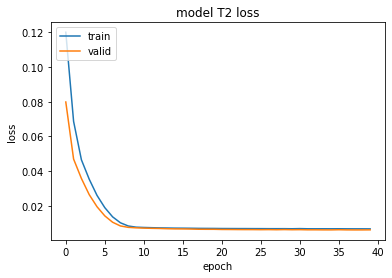

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model T2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [126]:
predictions = model_T2.predict(X_test)

13/13 [==============================] - 2s 70ms/step


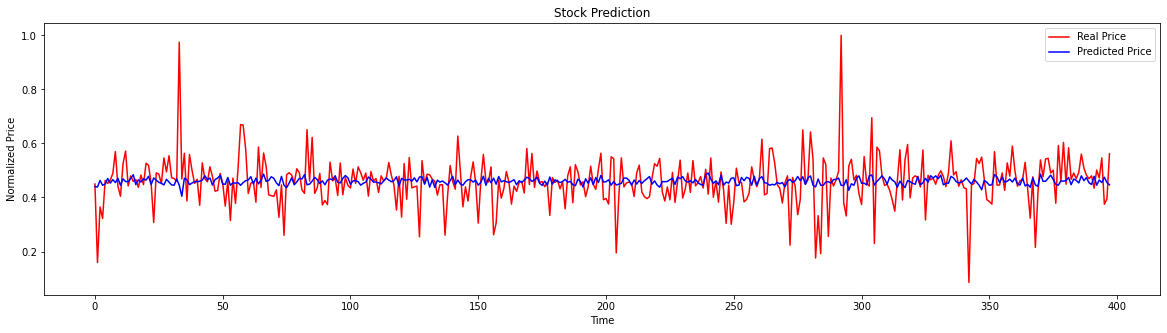

In [127]:
plt.plot(list(y_test), color = 'red', label = 'Real Price')
plt.plot(list(predictions), color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

# Hyprparameter tuning by kt.randomsearchtuner

First Try

In [105]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [106]:
num_words_ = 5000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=num_words_, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_valid = tokenizer.texts_to_sequences(X_valid)


In [107]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 300
trunc_type='post'
padding_type='post'

X_valid = pad_sequences(X_valid, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_train = pad_sequences(X_train, maxlen=maxlen, truncating= trunc_type, padding=padding_type)
X_test = pad_sequences(X_test, padding=padding_type, maxlen=maxlen, truncating= trunc_type)

In [108]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [123]:
import keras_tuner as kt
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(embedding_layer)
    model.add(LSTM(16, activation='tanh', return_sequences=True))
    model.add(LSTM(16, activation='tanh'))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="relu"))
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [124]:
random_search_tuner = kt.RandomSearch(build_model, objective="val_loss", max_trials=5, overwrite=True,
directory="stock", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Trial 5 Complete [00h 01m 13s]
val_loss: 0.007613323628902435

Best val_loss So Far: 0.007517953868955374
Total elapsed time: 00h 06m 07s
INFO:tensorflow:Oracle triggered exit


In [128]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [129]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values 

{'n_hidden': 7,
 'n_neurons': 38,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [130]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 7
n_neurons: 38
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.007517953868955374


In [137]:
#best_model.fit(X_train, y_train, epochs=10)
test_loss = best_model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 48ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882


In [138]:
predictions = best_model.predict(X_test)

13/13 [==============================] - 1s 46ms/step


In [139]:
mse(y_test, predictions)

0.007783573119100332

In [140]:
mae(y_test, predictions)

0.058879645019821895

In [142]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [143]:
mae(unnorm_y_test,unnorm_predictions)

99.77685101589

In [146]:
pd.Series(unnorm_y_test).describe()


count    398.000000
mean      11.222368
std      149.007602
min     -623.019532
25%      -53.540283
50%       11.274902
75%       73.621337
max      926.549805
dtype: float64

Second Try

In [330]:
import keras_tuner as kt
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
def build_model1(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=8, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(embedding_layer)
    model.add(LSTM(16, activation='tanh', return_sequences=True))
    model.add(LSTM(16, activation='tanh'))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="tanh"))
    model.add(tf.keras.layers.Dense(1, activation="relu"))
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [336]:
random_search_tuner = kt.RandomSearch(build_model1, objective="val_loss", max_trials=10, overwrite=True,
directory="stock1", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 01m 15s]
val_loss: 0.007471246644854546

Best val_loss So Far: 0.007471246644854546
Total elapsed time: 00h 12m 22s
INFO:tensorflow:Oracle triggered exit


In [341]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model1 = top3_models[0]

In [338]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values 

{'n_hidden': 7,
 'n_neurons': 44,
 'learning_rate': 0.0003491260272208854,
 'optimizer': 'adam'}

In [339]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 7
n_neurons: 44
learning_rate: 0.0003491260272208854
optimizer: adam
Score: 0.007471246644854546


In [342]:
best_model1.fit(X_train, y_train, epochs=5)
test_loss = best_model.evaluate(X_test, y_test)

Epoch 1/5
40/40 [==============================] - 11s 147ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810
Epoch 2/5
40/40 [==============================] - 6s 151ms/step - loss: 0.0066 - root_mean_squared_error: 0.0811
Epoch 3/5
40/40 [==============================] - 6s 147ms/step - loss: 0.0065 - root_mean_squared_error: 0.0808
Epoch 4/5
40/40 [==============================] - 6s 152ms/step - loss: 0.0066 - root_mean_squared_error: 0.0815
Epoch 5/5
13/13 [==============================] - 2s 45ms/step - loss: 0.0079 - root_mean_squared_error: 0.0886


In [346]:
predictions = best_model1.predict(X_test)

13/13 [==============================] - 1s 45ms/step


In [347]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [348]:
mae(unnorm_y_test,unnorm_predictions)

104.43917739433498

Third Try

In [182]:
import keras_tuner as kt
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
def build_model2(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=12, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-4, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(embedding_layer)
    model.add(LSTM(16, activation='relu', return_sequences=True))
    model.add(LSTM(16, activation='relu'))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="relu"))
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [183]:
random_search_tuner = kt.RandomSearch(build_model2, objective="val_loss", max_trials=10, overwrite=True,
directory="stock11", project_name="my_rnd1_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 01m 11s]
val_loss: 0.21181145310401917

Best val_loss So Far: 0.007647005841135979
Total elapsed time: 00h 11m 45s
INFO:tensorflow:Oracle triggered exit


In [184]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model1 = top3_models[0]

In [185]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 11
n_neurons: 123
learning_rate: 0.0001
optimizer: adam
Score: 0.007647005841135979


In [187]:
best_model1.fit(X_train, y_train, epochs=5)


Epoch 1/5
40/40 [==============================] - 6s 150ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805
Epoch 2/5
40/40 [==============================] - 6s 157ms/step - loss: 0.0065 - root_mean_squared_error: 0.0807
Epoch 3/5
40/40 [==============================] - 6s 152ms/step - loss: 0.0065 - root_mean_squared_error: 0.0804
Epoch 4/5
40/40 [==============================] - 6s 153ms/step - loss: 0.0065 - root_mean_squared_error: 0.0804
Epoch 5/5
40/40 [==============================] - 6s 151ms/step - loss: 0.0066 - root_mean_squared_error: 0.0811


In [190]:
test_loss = best_model1.evaluate(X_test, y_test)

13/13 [==============================] - 1s 44ms/step - loss: 0.0078 - root_mean_squared_error: 0.0882


In [191]:
predictions = best_model1.predict(X_test)

13/13 [==============================] - 1s 45ms/step


In [192]:
unnorm_predictions = []
for pred in predictions:
    unnorm_predictions.append(unnormalize(pred))
    
# store back-scaled actuals
unnorm_y_test = []
for y in y_test:
    unnorm_y_test.append(unnormalize(y))

In [194]:
mse(unnorm_y_test,unnorm_predictions)

22330.777195040268

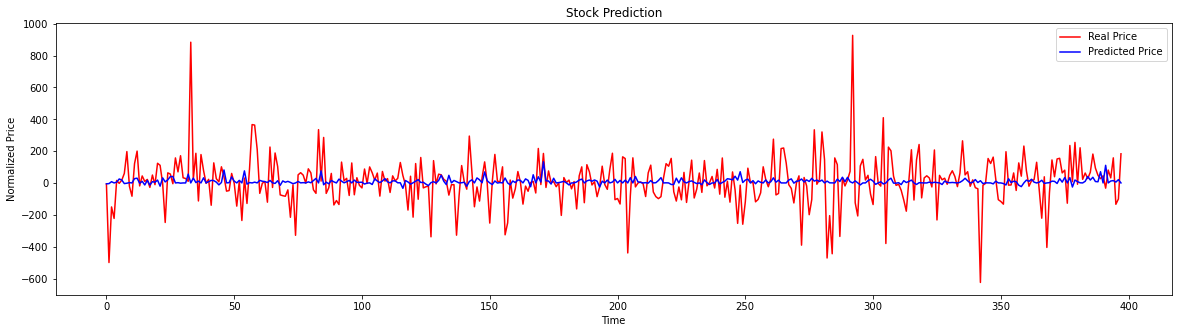

In [195]:
plt.plot(unnorm_y_test, color = 'red', label = 'Real Price')
plt.plot(unnorm_predictions, color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()

Fourth Try

In [110]:
import keras_tuner as kt
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
def build_model3(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=8, max_value=128)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam", "RMSprop"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(embedding_layer)
    model.add(LSTM(16, activation='relu', return_sequences=True))
    model.add(LSTM(16, activation='relu'))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="relu"))
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [112]:
random_search_tuner = kt.RandomSearch(build_model3, objective="val_loss", max_trials=8, overwrite=True,
directory="stock", project_name="my_rnd_search44", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Trial 8 Complete [00h 01m 12s]
val_loss: 0.007675974629819393

Best val_loss So Far: 0.007512581534683704
Total elapsed time: 00h 09m 36s
INFO:tensorflow:Oracle triggered exit


In [113]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [114]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 7
n_neurons: 61
learning_rate: 0.0008960175671873151
optimizer: adam
Score: 0.007512581534683704


In [116]:
best_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
40/40 [==============================] - 12s 155ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817
Epoch 2/5
40/40 [==============================] - 6s 160ms/step - loss: 0.0066 - root_mean_squared_error: 0.0814
Epoch 3/5
40/40 [==============================] - 6s 152ms/step - loss: 0.0066 - root_mean_squared_error: 0.0815
Epoch 4/5
40/40 [==============================] - 6s 152ms/step - loss: 0.0066 - root_mean_squared_error: 0.0811
Epoch 5/5
40/40 [==============================] - 6s 156ms/step - loss: 0.0066 - root_mean_squared_error: 0.0810


In [117]:
test_loss = best_model.evaluate(X_test, y_test)

13/13 [==============================] - 2s 46ms/step - loss: 0.0078 - root_mean_squared_error: 0.0884


In [119]:
predictions = best_model.predict(X_test)

13/13 [==============================] - 1s 42ms/step


In [120]:
mse(y_test ,predictions)

0.007807273880930032

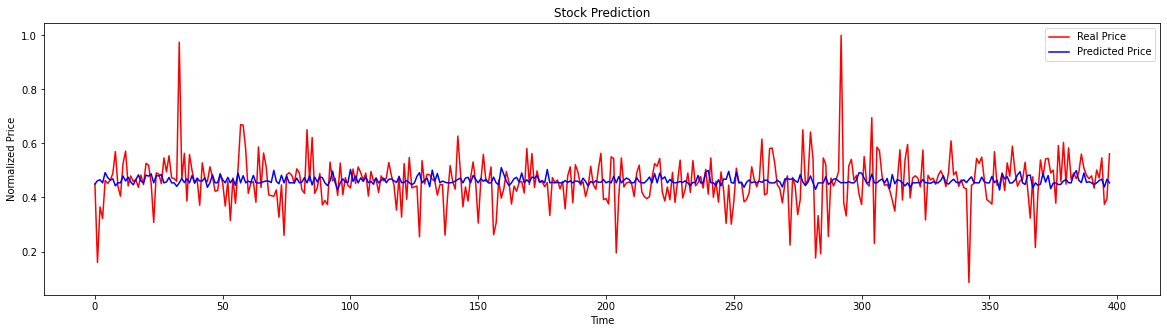

In [122]:
plt.plot(list(y_test), color = 'red', label = 'Real Price')
plt.plot(list(predictions), color = 'blue', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Normalized Price')
plt.rcParams["figure.figsize"] = (20,5)
plt.legend()
plt.show()